# Analisis Penjualan dan Profitabilitas Terhadap Dataset Toko

Analisis Terhadap Dataset tersebut :

- Menghitung total penjualan untuk setiap kategori dan sub-kategori produk.

- Visualisasi tren penjualan dari waktu ke waktu, misalnya perbulan

- Hitung profit per produk untuk menentukan produk yang paling menguntungkan

Pemahaman Mengenai Kolom - Kolom Dataset tersebut :

- Row id -> Nomor identifikasi unik untuk setiap baris dalam dataset

- Order id -> Nomor identifikasi untuk setiap pesanan

- Order date -> Tanggal ketika pesanan dibuat

- ship date -> Tanggal ketika pesanan dikirim

- Ship mode -> Metode pengiriman yang digunakan untuk pesanan

- customer id -> Nomor identifikasi untuk setiap pelanggan

- customer nama -> Nama pelanggan yang melakukan pembelian

- segment -> Kategori pelanggan

- country -> Negara tempat pelanggan berada 

- city -> Kota tempat pelanggan berada

- State -> Negara bagian tempat pelanggan berada (khusus untuk AS)

- Postal Code -> Kode pos untuk alamat pelanggan

- Region -> Wilayah geografis di mana pelanggan berada (misalnya, North, South, East, West)

- Product ID -> Nomor identifikasi unik untuk setiap produk

- Category -> Kategori produk, seperti Furniture, Office Supplies, atau Technology

- Sub-Category -> Sub-kategori yang lebih spesifik dari kategori produk

- Product Name -> Nama produk yang dijual

- Sales -> Total penjualan untuk produk dalam pesanan (dalam mata uang)

- Quantity -> Jumlah unit produk yang dipesan

- Discount -> Persentase diskon yang diterapkan pada produk (jika ada)

- Profit -> Total profit yang dihasilkan dari penjualan produk setelah memperhitungkan biaya (dalam mata uang)

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [51]:
data = pd.read_csv('store-sales-analysis.csv', sep= ';')
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,26196,2,0,419136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73194,3,0,219582
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775,5,45,-383031
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,4886,7,0,141694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706184,9,2,853092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,3834656,4,32,-676704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,134,1,0,6432
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,8598,1,0,223548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25248,3,2,41028


In [52]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,26196,2,0,419136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73194,3,0,219582
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775,5,45,-383031
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,4886,7,0,141694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706184,9,2,853092


In [53]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,3834656,4,32,-676704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,134,1,0,6432
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,8598,1,0,223548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25248,3,2,41028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,9196,2,0,156332


In [54]:
data.shape

(2121, 21)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Row ID         2121 non-null   int64 
 1   Order ID       2121 non-null   object
 2   Order Date     2121 non-null   object
 3   Ship Date      2121 non-null   object
 4   Ship Mode      2121 non-null   object
 5   Customer ID    2121 non-null   object
 6   Customer Name  2121 non-null   object
 7   Segment        2121 non-null   object
 8   Country        2121 non-null   object
 9   City           2121 non-null   object
 10  State          2121 non-null   object
 11  Postal Code    2121 non-null   int64 
 12  Region         2121 non-null   object
 13  Product ID     2121 non-null   object
 14  Category       2121 non-null   object
 15  Sub-Category   2121 non-null   object
 16  Product Name   2121 non-null   object
 17  Sales          2121 non-null   int64 
 18  Quantity       2121 non-null

- Menghapus kolom 'Row Id'

In [56]:
data = data.drop(columns='Row ID')

In [57]:
data.sample(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1035,US-2017-139647,5/11/2017,5/13/2017,First Class,TS-21370,Todd Sumrall,Corporate,United States,Phoenix,Arizona,85023,West,FUR-BO-10004467,Furniture,Bookcases,Bestar Classic Bookcase,209979,7,7,-3569643
1613,CA-2017-151225,10/27/2017,10/29/2017,First Class,JM-15655,Jim Mitchum,Corporate,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,189576,1,2,94788
988,CA-2014-106229,6/7/2014,6/11/2014,Second Class,NR-18550,Nick Radford,Consumer,United States,Aurora,Illinois,60505,Central,FUR-TA-10002041,Furniture,Tables,"Bevis Round Conference Table Top, X-Base",268935,3,5,-2097693


In [58]:
data.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [59]:
data.duplicated().sum()

np.int64(1)

In [60]:
data = data.drop_duplicates()

In [61]:
data.duplicated().sum()

np.int64(0)

- Mengubah type data pada setiap kolom

In [62]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Sales'] = pd.to_numeric(data['Sales'])

In [63]:
for i in data.columns :
    print(i, data[i].unique())

Order ID ['CA-2016-152156' 'US-2015-108966' 'CA-2014-115812' ... 'US-2015-151435'
 'CA-2014-110422' 'CA-2017-121258']
Order Date <DatetimeArray>
['2016-11-08 00:00:00', '2015-10-11 00:00:00', '2014-06-09 00:00:00',
 '2017-07-16 00:00:00', '2015-09-25 00:00:00', '2015-09-17 00:00:00',
 '2016-12-08 00:00:00', '2015-12-27 00:00:00', '2015-04-18 00:00:00',
 '2016-06-17 00:00:00',
 ...
 '2014-08-15 00:00:00', '2015-03-26 00:00:00', '2017-01-14 00:00:00',
 '2016-06-06 00:00:00', '2015-10-10 00:00:00', '2017-01-29 00:00:00',
 '2016-06-03 00:00:00', '2017-06-01 00:00:00', '2015-03-19 00:00:00',
 '2014-01-21 00:00:00']
Length: 889, dtype: datetime64[ns]
Ship Date <DatetimeArray>
['2016-11-11 00:00:00', '2015-10-18 00:00:00', '2014-06-14 00:00:00',
 '2017-07-18 00:00:00', '2015-09-30 00:00:00', '2015-09-21 00:00:00',
 '2016-12-10 00:00:00', '2015-12-31 00:00:00', '2015-04-22 00:00:00',
 '2016-06-18 00:00:00',
 ...
 '2015-03-30 00:00:00', '2017-01-20 00:00:00', '2014-11-03 00:00:00',
 '2016-08-25

In [64]:
data.sample(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1369,CA-2014-113880,2014-03-01,2014-03-05,Standard Class,VF-21715,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,60126,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634116,6,3,-1721172
1537,US-2014-131275,2014-03-18,2014-03-24,Standard Class,SC-20050,Sample Company A,Home Office,United States,Burbank,California,91505,West,FUR-FU-10004597,Furniture,Furnishings,Eldon Cleatmat Chair Mats for Medium Pile Carpets,111,2,0,1443


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2120 entries, 0 to 2120
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       2120 non-null   object        
 1   Order Date     2120 non-null   datetime64[ns]
 2   Ship Date      2120 non-null   datetime64[ns]
 3   Ship Mode      2120 non-null   object        
 4   Customer ID    2120 non-null   object        
 5   Customer Name  2120 non-null   object        
 6   Segment        2120 non-null   object        
 7   Country        2120 non-null   object        
 8   City           2120 non-null   object        
 9   State          2120 non-null   object        
 10  Postal Code    2120 non-null   int64         
 11  Region         2120 non-null   object        
 12  Product ID     2120 non-null   object        
 13  Category       2120 non-null   object        
 14  Sub-Category   2120 non-null   object        
 15  Product Name   2120 non-nu

# 1.Menghitung total penjualan untuk setiap kategori dan sub-kategori produk

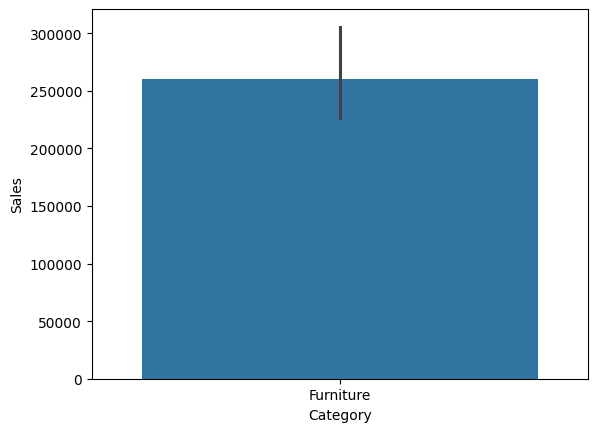

In [66]:
plt.Figure(figsize=(12,6))
sns.barplot(data=data, x='Category', y='Sales')

plt.show()

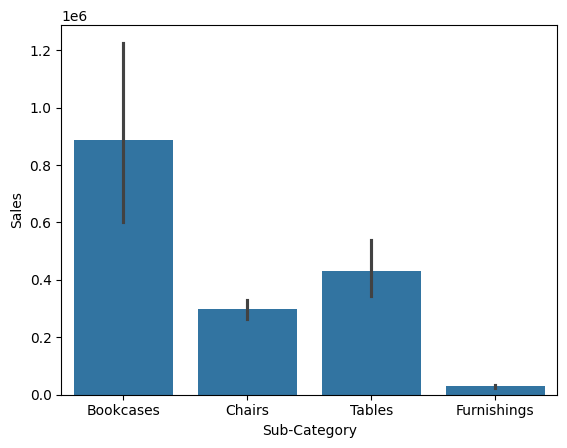

In [67]:
plt.Figure(figsize=(12,6))
sns.barplot(data=data, x='Sub-Category', y='Sales')

plt.show()

In [68]:
data_penjualan = data.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
data_penjualan

,Category,Sub-Category,Sales
0,Furniture,Bookcases,202537794
1,Furniture,Chairs,183212705
2,Furniture,Furnishings,27840885
3,Furniture,Tables,137518382


C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_14724\32777293.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




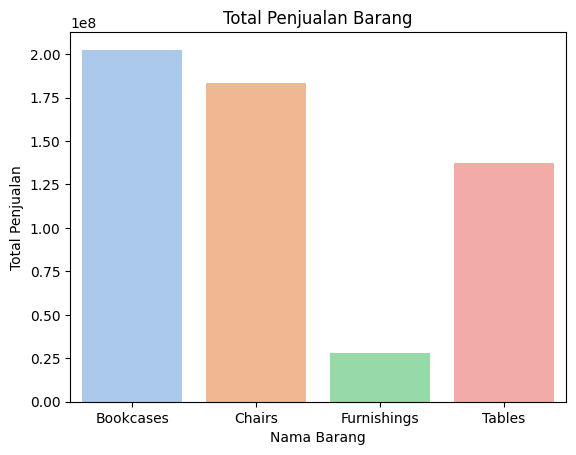

In [69]:
plt.Figure(figsize=(12,7))
sns.barplot(data=data_penjualan, x='Sub-Category', y='Sales', palette='pastel')
plt.title('Total Penjualan Barang')
plt.xlabel('Nama Barang')
plt.ylabel('Total Penjualan')
plt.savefig('Grafik Total Penjualan Barang')


plt.show()

Pada grafik ini menunjukkan bahwa penjualan yang paling tinggi yaitu Boocases dengan total penjualan yang mencapai sekitar 2 juta lebih, ini menjadikan bookcases adalah kategori barang yang paling laku.

Disusul dengan chairs dan tables yang memiliki penjualan yang lebih sedikit dibandingkan bookcases, tetapi lebih tinggi daripada furnishings.

Diantara semua kategori barang, ada barang yang memiliki penjualan barang yang paling terendah yaitu Tables. Dimana tables ini memiliki penjualan sekitar 250.000 lebih dan ini membuktikan bahwa barang ini kurang diminati.

# 2.Visualisasi tren penjualan dari waktu ke waktu, misalnya perbulan

In [70]:
data['Order Date']

0      2016-11-08
1      2016-11-08
2      2015-10-11
3      2014-06-09
4      2014-06-09
          ...    
2116   2015-03-19
2117   2016-12-05
2118   2015-09-06
2119   2014-01-21
2120   2017-02-26
Name: Order Date, Length: 2120, dtype: datetime64[ns]

In [71]:
data['Month'] = data['Order Date'].dt.to_period('M')
month_sales = data.groupby('Month')['Sales'].sum().reset_index()
month_sales['Month'] = month_sales['Month'].dt.to_timestamp()

In [72]:
fig = px.line(month_sales, x = 'Month',
        y = 'Sales', 
        title = 'Grafik Penjualan Per-Bulan')

fig.update_layout(xaxis_title = 'Bulan', yaxis_title = 'Total Penjualan',
                  title_x = 0.5,
                  )

- Secara keseluruhan, grafik menunjukan total penjualan dari januari 2014 sampai juli 2017, terjadi beberapa periode mengalaimi peningkatan maupun penurunan secara segnifikan.

- Lonjakan penjualan yang paling mencolok terjadi pada tahun 2016 lebih spesifik pada september 2016, mungkin disebabkan dengan beberapa faktor tertentu.

- Lonjakan penurunan yang paling mencolok setelah terjadi lonjakan penjualan yang paling mencolok terjadi pada bulan oktober 2016. Mungkin disebabkan beberapa faktor tertentu.

- Yang menjadi catatan meningkatkan strategi penjualanan untuk mengatasi penurunan pasca-lonjakan dan memastikan pertumbuhan penjualan konsisten

# 3.Hitung profit per produk untuk menentukan produk yang paling menguntungkan

In [73]:
profit_produk = data.groupby('Product Name')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending=False)
profit_produk

,Product Name,Profit
175,Global Deluxe High-Back Manager's Chair,15585910
217,Hon 4070 Series Pagoda Armless Upholstered Sta...,13886348
313,Office Star - Professional Matrix Back Chair w...,11792928
218,Hon 4070 Series Pagoda Round Back Stacking Chairs,10528144
263,"Lifetime Advantage Folding Chairs, 4/Carton",9922640
...,...,...
211,Hon 2090 ÒPillow SoftÓ Series Mid Back Swivel/...,-8246763
21,Balt Solid Wood Round Tables,-12010581
321,"Riverside Palais Royal Lawyers Bookcase, Royal...",-15813591
42,Bush Advantage Collection Racetrack Conference...,-19343976



- Produk yang paling menguntungkan adalah 'Global Deluxe High-Back Manager's Chair' memilik profit tertinggi sebesar 15.585.910 ini menunjukkan produk yang paling menguntungkan diatara produk lainnya.

- Produk 'Global Deluxe High-Back Manager's Chair' produk yang memiliki daya tarik pasar yang lebih besar atau biaya yang lebih rendah dibandingankan dengan yang lain.

- Prduk 'Global Deluxe High-Back Manager's Chair' yang paling menguntungkan dapat membantu dalam merencanakan strategi penjualan dan pemasaran mungkin dengan cara meningkatkan kuantitas atau kualitas produk tersebut. Fokus pada produk dengan profit tinggi dapat meningkatkan keseluruhan profitabilitas bisnis.